This file is used  to visualize the variant selection results of k562_bt142 data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import vireoSNP

## Read data

In [2]:
# Generate synthetic data
np.random.seed(42)  # For reproducibility
n_variants = 10
n_cells = 20
cell_types = ['Type A', 'Type B', 'Type C', 'Type D']

# Allele frequency matrix
allele_freq_matrix = np.random.rand(n_variants, n_cells)

# Cell type information
cell_type_info = pd.DataFrame({
    'Cell': [f'Cell_{i+1}' for i in range(n_cells)],
    'CellType': np.random.choice(cell_types, n_cells, replace=True)
})

In [8]:
allele_freq_matrix[:10, :10]
allele_freq_matrix.shape[0]

10

In [12]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

raw_col = cm.get_cmap('pink_r', 200)
new_col = np.vstack((raw_col(np.linspace(0, 0.7, 10)),
                     raw_col(np.linspace(0.7, 1, 90))))
segpink = ListedColormap(new_col, name='segpink')

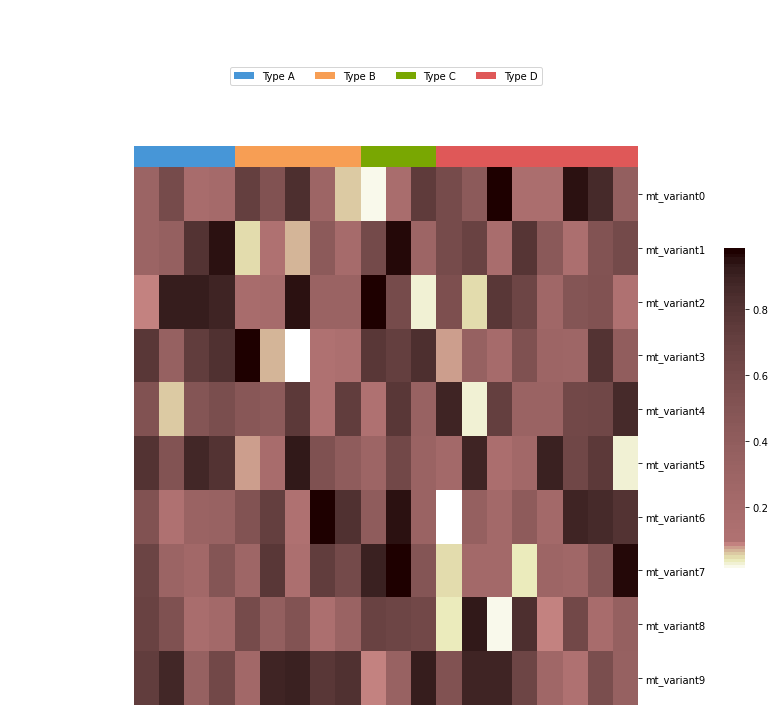

In [14]:
mtSNP_ids = ['mt_variant%d' %x for x in range(allele_freq_matrix.shape[0])]
cell_label = cell_type_info.CellType
id_uniq = ['Type A', 'Type B', 'Type C', 'Type D']
vireoSNP.plot.anno_heat(allele_freq_matrix, col_anno=cell_label, col_order_ids=id_uniq,
                        cmap=segpink, yticklabels=mtSNP_ids)